In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import StratifiedGroupKFold

In [2]:
df = pd.DataFrame()

In [3]:
class_sizes = [3, 5, 6]
num_records = 90_000
num_groups = 30

input_cols = ["input_1", "input_2", "input_3"]

In [4]:
output_cols = []
new_output_cols = []
for i, cs in enumerate(class_sizes):
    output_cols.append(f"target_{i}")
    df[f"target_{i}"] = np.random.randint(1, cs+1, size=num_records)
    
    for j in range(cs):
        new_output_cols.append(f"target_{i}_{j}")

In [5]:
len(new_output_cols)

14

In [6]:
df[input_cols] = np.ones((num_records, 3))

In [7]:
df

,target_0,target_1,target_2,input_1,input_2,input_3
0,1,3,4,1.0,1.0,1.0
1,2,4,6,1.0,1.0,1.0
2,3,5,5,1.0,1.0,1.0
3,2,2,2,1.0,1.0,1.0
4,1,5,4,1.0,1.0,1.0
...,...,...,...,...,...,...
89995,1,3,4,1.0,1.0,1.0
89996,3,4,3,1.0,1.0,1.0
89997,1,4,1,1.0,1.0,1.0
89998,3,5,6,1.0,1.0,1.0


In [8]:
df["group"] = np.random.randint(1, num_groups+1, size=num_records)

In [9]:
ohe = OneHotEncoder()

In [10]:
ohe.fit(df[output_cols])

OneHotEncoder()

In [11]:
df[new_output_cols] = ohe.transform(df[output_cols]).toarray()

In [12]:
df = df.drop(columns=output_cols)

In [13]:
df

,input_1,input_2,input_3,group,target_0_0,target_0_1,target_0_2,target_1_0,target_1_1,target_1_2,target_1_3,target_1_4,target_2_0,target_2_1,target_2_2,target_2_3,target_2_4,target_2_5
0,1.0,1.0,1.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,1.0,11,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,1.0,20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,1.0,18,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,1.0,1.0,1.0,5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
89996,1.0,1.0,1.0,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
89997,1.0,1.0,1.0,11,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
89998,1.0,1.0,1.0,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
for i, col in enumerate(new_output_cols):
    df[col] = np.where(df[col]==1, i+1, i+len(new_output_cols))

In [15]:
df

,input_1,input_2,input_3,group,target_0_0,target_0_1,target_0_2,target_1_0,target_1_1,target_1_2,target_1_3,target_1_4,target_2_0,target_2_1,target_2_2,target_2_3,target_2_4,target_2_5
0,1.0,1.0,1.0,1,1,15,16,17,18,6,20,21,22,23,24,12,26,27
1,1.0,1.0,1.0,11,14,2,16,17,18,19,7,21,22,23,24,25,26,14
2,1.0,1.0,1.0,20,14,15,3,17,18,19,20,8,22,23,24,25,13,27
3,1.0,1.0,1.0,18,14,2,16,17,5,19,20,21,22,10,24,25,26,27
4,1.0,1.0,1.0,3,1,15,16,17,18,19,20,8,22,23,24,12,26,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,1.0,1.0,1.0,5,1,15,16,17,18,6,20,21,22,23,24,12,26,27
89996,1.0,1.0,1.0,2,14,15,3,17,18,19,7,21,22,23,11,25,26,27
89997,1.0,1.0,1.0,11,1,15,16,17,18,19,7,21,9,23,24,25,26,27
89998,1.0,1.0,1.0,3,14,15,3,17,18,19,20,8,22,23,24,25,26,14


In [16]:
df = df.melt(
    id_vars = input_cols + ["group"],
    var_name = "target_name",
    value_name = "class_label"
)

In [17]:
df

,input_1,input_2,input_3,group,target_name,class_label
0,1.0,1.0,1.0,1,target_0_0,1
1,1.0,1.0,1.0,11,target_0_0,14
2,1.0,1.0,1.0,20,target_0_0,14
3,1.0,1.0,1.0,18,target_0_0,14
4,1.0,1.0,1.0,3,target_0_0,1
...,...,...,...,...,...,...
1259995,1.0,1.0,1.0,5,target_2_5,27
1259996,1.0,1.0,1.0,2,target_2_5,27
1259997,1.0,1.0,1.0,11,target_2_5,27
1259998,1.0,1.0,1.0,3,target_2_5,14


In [18]:
sgkf = StratifiedGroupKFold(
    n_splits = 5, 
    random_state = 0, 
    shuffle = True
)

sgkf_split = sgkf.split(
    X = df[input_cols + ["group", "target_name"]],
    y = df["class_label"], 
    groups = df["group"]
)

In [19]:
for fold, (train_idxs, test_idxs) in enumerate(sgkf_split):
    df.loc[test_idxs, "fold"] = fold

In [20]:
df

,input_1,input_2,input_3,group,target_name,class_label,fold
0,1.0,1.0,1.0,1,target_0_0,1,4.0
1,1.0,1.0,1.0,11,target_0_0,14,3.0
2,1.0,1.0,1.0,20,target_0_0,14,0.0
3,1.0,1.0,1.0,18,target_0_0,14,0.0
4,1.0,1.0,1.0,3,target_0_0,1,1.0
...,...,...,...,...,...,...,...
1259995,1.0,1.0,1.0,5,target_2_5,27,4.0
1259996,1.0,1.0,1.0,2,target_2_5,27,3.0
1259997,1.0,1.0,1.0,11,target_2_5,27,3.0
1259998,1.0,1.0,1.0,3,target_2_5,14,1.0


In [21]:
temp = (
    df
    .groupby(
        by=["fold", "class_label"]
    )
    .agg(
        target_count = pd.NamedAgg("class_label", "count")
    )
    .reset_index()
    .pivot_table(
        index="class_label",
        columns="fold",
        values="target_count"
    )
)

Text(0.5, 1.0, 'Heatmap of class distribution')

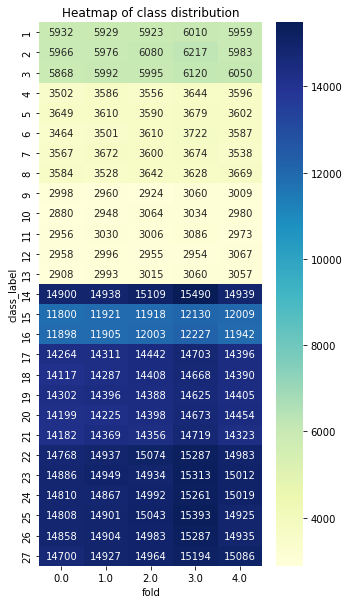

In [22]:
plt.figure(figsize = (5, 10))
sb.heatmap(
    temp,
    annot = True,
    cmap = "YlGnBu",
    fmt = "g"
)
plt.title("Heatmap of class distribution")

In [23]:
temp.sum(axis="rows")

fold
0.0    248724
1.0    250558
2.0    251972
3.0    256858
4.0    251888
dtype: int64

In [26]:
df[["group", "fold"]].drop_duplicates().sort_values(by=["fold"])

,group,fold
69,28,0.0
32,24,0.0
2,20,0.0
3,18,0.0
18,4,0.0
6,27,0.0
27,21,1.0
15,14,1.0
9,25,1.0
14,23,1.0
